# Aula 10 - Dinâmica

## Instalando bibliotecas

Vamos instalar as bibliotecas necessárias para a visualização da árvore de decisão.

In [ ]:
!pip install graphviz

## Graphviz e Linux

Este processo de visualização da árvore de decisão é um processo opcional. Caso não tenha o graphviz em seu sistema, abra o terminal e faça a instalação com o comando

**sudo apt install graphviz**


## Graphviz e Windows
Este processo de visualização da árvore de decisão é um processo opcional. Caso queira utilizar no Windows, você terá que instalar também o **graphviz** em seu sistema operacional.

Para isso, acesse https://graphviz.org/download/ e faça o download da primeira opção para Windows ou pelo link https://gitlab.com/graphviz/graphviz/-/package_files/9574245/download

Na instalação, **marque a opção** conforme a imagem:

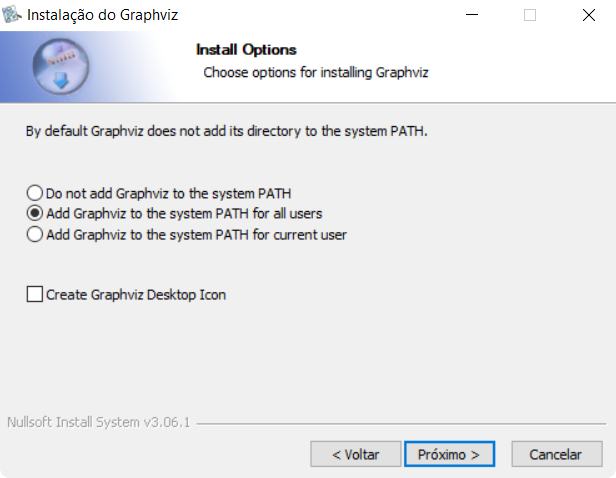

Após fazer a instalação, você precisará fechar o servidor do jupyter notebook e iniciar novamente.


## Graphviz e Mac
Segundo o site de download do graphviz (https://graphviz.org/download/), você pode instalar com o comando no terminal:

**sudo port install graphviz**

ou

**brew install graphviz**

## Importando as bibliotecas necessárias

Primeiro iremos importar todos os recursos já disponíveis em Python que utilizaremos para resolver este problema!

In [2]:
import pandas as pd
from sklearn import tree
import graphviz

# Dados
Os dados serão lidos a partir de um **CSV** e representados em um **Pandas DataFrame**.

São poucas linhas de informação, apenas 12. Observe a leitura e exibição dos dados:

In [4]:
dados_orig = pd.read_csv('./notebooks/lessons/10/bacteria.csv', sep = '\t', header = 0, index_col = 0)
dados_orig

,Núcleos,Caudas,Cor,Membrana,Classe
ID,,,,,
1,1,1,Clara,Fina,Lethaugica
2,2,1,Clara,Fina,Lethaugica
3,1,1,Clara,Grossa,Lethaugica
4,1,1,Escura,Fina,Lethaugica
5,1,1,Escura,Grossa,Lethaugica
6,2,2,Escura,Fina,Brutolina
7,2,2,Clara,Fina,Brutolina
8,2,2,Escura,Grossa,Brutolina
9,2,1,Escura,Grossa,Saudavel


# Transformação de variáveis
Para trabalhar com árvores de decisão, é necessário que as variáveis sejam numéricas. Assim, iremos transformar as informações representadas como texto.

Além disso, iremos guardar os nomes das classes e atributos para uma futura visualização do modelo do classificador:

In [5]:
atrib_desc  = list(dados_orig.columns)[:-1]
classe_desc = list(dados_orig.Classe.unique())
classe_desc.sort()
classe_desc

['Brutolina', 'Lethaugica', 'Saudavel']

In [6]:
dados = dados_orig.copy(deep = True)

dados['Cor'] = dados['Cor'].map({'Clara':0, 'Escura':1})

dados['Membrana'] = dados['Membrana'].map({'Fina':0, 'Grossa':1})

dados

,Núcleos,Caudas,Cor,Membrana,Classe
ID,,,,,
1,1,1,0,0,Lethaugica
2,2,1,0,0,Lethaugica
3,1,1,0,1,Lethaugica
4,1,1,1,0,Lethaugica
5,1,1,1,1,Lethaugica
6,2,2,1,0,Brutolina
7,2,2,0,0,Brutolina
8,2,2,1,1,Brutolina
9,2,1,1,1,Saudavel


# Separar em atributos e labels 
Iremos separar o nosso conjunto de dados em duas partes: uma contendo todas as colunas que são características das bactérias (atributos) e outra contendo a classe (grupo, labels) ao qual a bactéria pertence (Saudável, Brutolina, Lethaugica).

In [7]:
classe = dados['Classe']
atributos = dados.drop('Classe', axis = 1)
atributos

,Núcleos,Caudas,Cor,Membrana
ID,,,,
1,1,1,0,0
2,2,1,0,0
3,1,1,0,1
4,1,1,1,0
5,1,1,1,1
6,2,2,1,0
7,2,2,0,0
8,2,2,1,1
9,2,1,1,1


In [8]:
classe

ID
1     Lethaugica
2     Lethaugica
3     Lethaugica
4     Lethaugica
5     Lethaugica
6      Brutolina
7      Brutolina
8      Brutolina
9       Saudavel
10      Saudavel
11      Saudavel
12      Saudavel
Name: Classe, dtype: object

# Treinamento
Nesta etapa, iremos criar um classificador utilizando uma árvore de decisão, implementada em **DecisionTreeClassifier** e disponível em **sklearn.tree**. Para conhecer melhor seus parâmetros, acesse https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [9]:
classificador = tree.DecisionTreeClassifier(max_depth = 2, criterion = 'gini')
classificador = classificador.fit(atributos, classe)

Agora, iremos visualizar graficamente a estrutura de árvore de decisão utilizada pelo classificador!

In [10]:
classe_desc

['Brutolina', 'Lethaugica', 'Saudavel']

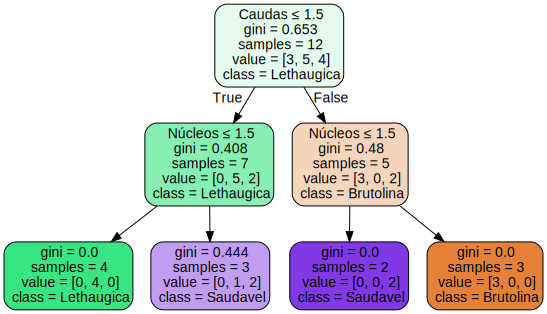

In [12]:
gclassif = tree.export_graphviz(classificador, out_file = None,
                                feature_names = atrib_desc,
                                class_names = ['Brutolina', 'Lethaugica', 'Saudavel'],
                                filled = True, rounded = True,
                                special_characters = True)

garv = graphviz.Source(gclassif)
garv

# Gini index

O gini index mede o grau de impureza das amostras que passam por uma regra da árvore. Ele varia de 0.0 até 1.0 e pode ser definido pela fórmula.

$g = 1- \sum^{n}_{1}(P_i)^2$

onde $P_i$ representa a probabilidade de uma amostra ser classificada na classe $i$. Note que $P_i$ é calculado para cada regra, então seu gini depende da quantidade de amostras que passam por ela.

Exemplo para a regra **Cor ≤ 0.5**

In [13]:
1 - ((1.0/3.0)**2 + (2.0/3.0)**2)

0.4444444444444444

Exemplo para a regra **Núcleos ≤ 1.5**

In [14]:
1 - ((2.0/5.0)**2 + (3.0/5.0)**2)

0.48

# Predição
Agora que temos um classificador treinado, será que podemos utilizar o modelo para classificar novas bactérias?
Sim! Basta utilizar a função **predict** passando um array de atributos.

In [15]:
print("Exemplo de predição:")

atributos1 = [[1, 1, 2, 2]]
pred1 = classificador.predict(atributos1)

atributos2 = [[2, 2, 2, 2]]
pred2 = classificador.predict(atributos2)

print("Os exemplos foram classificados nas classes {} e {}.".format(pred1[0], pred2[0]))

Exemplo de predição:
Os exemplos foram classificados nas classes Lethaugica e Brutolina.


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Por último, podemos observar a importância de cada atributo na classificação:

In [16]:
classificador.feature_importances_

array([0.603663, 0.396337, 0.      , 0.      ])

In [17]:
print(dict(zip(dados_orig.columns, classificador.feature_importances_)))

{'Núcleos': 0.6036630036630036, 'Caudas': 0.3963369963369963, 'Cor': 0.0, 'Membrana': 0.0}
